In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data() #labeled data set - picture with label 

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 10 training labels as digits:
 [5 0 4 1 9 2 1 3 1 4]



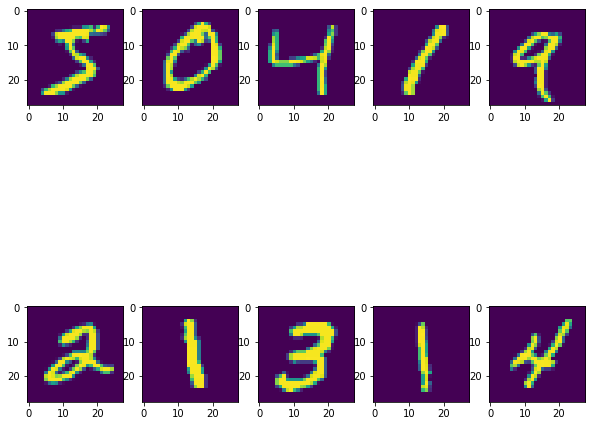

In [76]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels -la imagen 
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28  
print("First 10 training labels as digits:\n", y_train[:10])  # label el numbero de la imagen 
print("")

# Plot the first 10 images
#plt.imshow(x_train[0])

### STUDENT CODE HERE ###
### --> Find a way to plot a sample of 10 images of hand-written digits in the training data
w = 10 #width
h = 10 #height
fig = plt.figure(figsize=(h, w)) #creando una nueva imagen con todas las imagines 
columns = 5 
rows = 2
j = 0 # setting variable for iteration over numbers

for i in range(1, columns*rows +1): #no empieza con 0 entonces tenemos que agregar el +1 
    img = np.random.randint(10, size=(h,w)) #new image 
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[j]) 
    j = j+1 #go through data "numbers" - with images

plt.show()

### END STUDENT CODE ###

In [77]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [78]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
#  one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
model = Sequential([ # layer after input ,  input
  Dense(1000, activation='sigmoid', input_shape=(784,)), # dense amount of nodes we have, comma okayyy???
# reloop - asctivate - input times the node number - and then apply this relu - non-linear fx
  Dense(10, activation='softmax'), #output (since its last layer) we want it to be 10
])

### --> add Dense (fully connected) layers to the model to connect input to output.
###  Make sure that the dimensionality is correct: input should be # pixels large, 
###  output should be #classes large. Google is your friend.
### END STUDENT CODE ###

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###

model.compile(
  optimizer='sgd',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


### --> Call model.compile with the right arguments.
### END STUDENT CODE ###

In [80]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

### STUDENT CODE HERE ###

# model.predict_proba(x_train, 10,0)
# model.predict_proba(x_test, 10,0)
### --> call model.predict_proba() on the test images, and show the predictions of the
###  untrained model for the first 10 images. Also, plot those images, as you did above.
### END STUDENT CODE ###


Test loss: 3.05
Test accuracy: 0.0915


In [81]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 32
EPOCHS = 10

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 261us/step - loss: 0.4079 - acc: 0.8901 - val_loss: 0.2199 - val_acc: 0.9438
Epoch 2/10
54000/54000 [==============================] - 15s 272us/step - loss: 0.2360 - acc: 0.9342 - val_loss: 0.1783 - val_acc: 0.9530
Epoch 3/10
54000/54000 [==============================] - 15s 274us/step - loss: 0.1928 - acc: 0.9465 - val_loss: 0.1587 - val_acc: 0.9578
Epoch 4/10
54000/54000 [==============================] - 15s 269us/step - loss: 0.1678 - acc: 0.9530 - val_loss: 0.1431 - val_acc: 0.9617
Epoch 5/10
54000/54000 [==============================] - 14s 268us/step - loss: 0.1500 - acc: 0.9579 - val_loss: 0.1290 - val_acc: 0.9668
Epoch 6/10
54000/54000 [==============================] - 15s 271us/step - loss: 0.1373 - acc: 0.9620 - val_loss: 0.1198 - val_acc: 0.9673
Epoch 7/10
54000/54000 [==============================] - 15s 276us/step - loss: 0.1234 - acc: 0.9662 - val_loss: 0.1

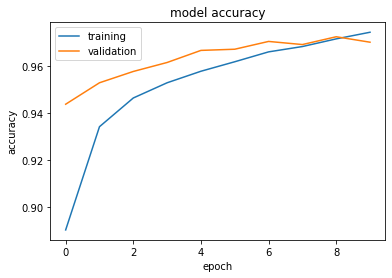

In [82]:
# Plot the progression of the training process

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Test loss: 0.115
Test accuracy: 0.967


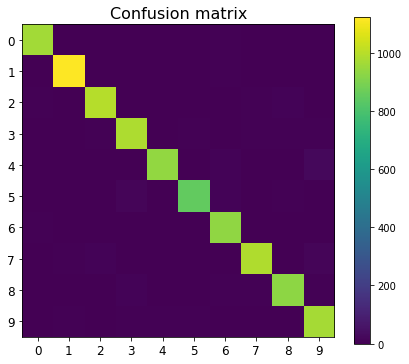

In [83]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

# y_pred_test = model.predict_proba(x_test) # obtain one-hot encoded predictions for the x_test images
# from sklearn.metrics import confusion_matrix

### STUDENT CODE HERE ###
### --> Now predict again the labels for the test images, but after proper training.

y_pred_test = model.predict_proba(x_test) # obtain one-hot encoded predictions for the x_test images
y_test_index      = [ np.argmax(i) for i in y_test ] # actual number known labels
y_pred_test_index = [ np.argmax(i) for i in y_pred_test ] # actual number predictions
y_pred_test_proba = [ y_pred_test[i][ y_pred_test_index[i] ] for i in range(len(y_test_index)) ] # probabilities to be correct

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_index ))
plt.xticks(np.arange(10), np.arange(10), rotation=0, fontsize=12)
plt.yticks(np.arange(10), np.arange(10), fontsize=12)
plt.colorbar()
plt.show()
###  Build a confusion matrix to show which labels we often confuse with what.
###  (Note that the y_test and y_pred are still one-hot encoded, so you need to get
###   the index of the maximum entry to find the corresponding predicted 'number'.
### END STUDENT CODE ###
# the colos are the iterations, how many times, 9 got confused with a 9 - not really because pretty accurate! 
#its to see the the light purlple to blue which not in the line, this is the ones 

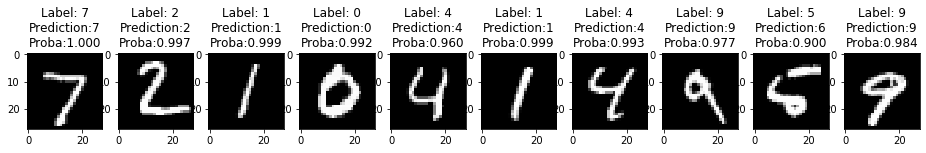

In [84]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###

plt.figure(figsize=[16,16])

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title("Label: {0}\nPrediction:{1}\nProba:{2:.3f}".format(
        y_test_index[i], y_pred_test_index[i], y_pred_test_proba[i] ))
    plt.imshow(x_test[i].reshape([28,28]),cmap='gray');
### --> Now show some hand-written digit images from the test sample, 
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.
### END STUDENT CODE ###